In [693]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [694]:
X, y = make_moons(n_samples=50, noise=0.2, random_state=42)

In [695]:
#X = np.hstack([X, np.ones((X.shape[0], 1))])

In [696]:
def sigmoid(x):
    y = 1/(1 + np.exp(-x)) 
    return y

In [697]:
def feed_forward_1(X, weights):
    outputs = []
    x_copy = X.copy()
    x_copy = x_copy[:, :-1]
    for w in weights:
        x_inp = np.hstack([x_copy, np.ones((x_copy.shape[0], 1))])
        output = sigmoid(np.dot(x_inp, w))
        outputs.append(output) 
        x_copy = output
    return outputs

In [698]:
def log_loss(ytrue, ypred):
    loss = -((ytrue*np.log(ypred)) + ((1 - ytrue)*np.log(1 - ypred)))
    return loss


In [699]:
def backprop(weights,output1,output2,ytrue,X_input, LR_O, LR_H):
    #separate learning rates for outer and inner weights.
    wH = weights[0]
    w0 = weights[1]
    #STEP A:
    ytrue = ytrue.reshape(-1, 1)
    error = (output2.reshape(-1,1) - ytrue) * log_loss(ytrue , output2.reshape(-1,1))
    #STEP B: 
    sig_deriv = output2 * ( 1 - output2)
    #derivative of the sigmoid function with respect to the hidden output * weights
    y_grad = sig_deriv * error
    #STEP C:
    hidden_out_with_bias = np.hstack([output1,np.ones((output1.shape[0] ,1))]) #don't forget the bias!
    delta_wo = np.dot(-y_grad.transpose(), hidden_out_with_bias ) * LR_O
    #and finally, old weights + delta weights -> new weights!
    w0_new = w0 + delta_wo.transpose()
    #STEP D:
    sig_deriv_2 = output1 * ( 1 - output1)
    H_grad = sig_deriv_2 * np.dot(y_grad , w0_new[:2].transpose())
    #exclude the bias (3rd column) of the outer weights, since it is not backpropagated!
    #STEP E:
    delta_wH = np.dot(-H_grad.transpose(), X_input ) * LR_H # with or without bias?
    wH_new = wH + delta_wH.transpose() #old weights + delta weights -> new weights!
    return wH_new, w0_new

In [700]:
# Initialize the weights

w_1 = np.random.rand(X.shape[1],2)
w_2 = np.random.rand(3,1)
wx = [w_1, w_2]

In [701]:
LOSS_VEC = []
for i in range(500):
    out1, out2 = feed_forward_1(X, wx)
    LOSS_VEC.append(sum(log_loss(y, out2))[0])
    new_weights = backprop(wx, out1, out2, y, X, .01,.5)
    wx = new_weights

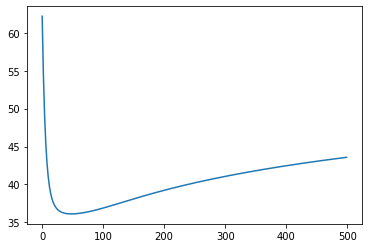

In [702]:
plt.plot(LOSS_VEC)#calculate accuracy

In [703]:
LOSS_VEC[-10:]

[43.485548091807544,
 43.49587532243576,
 43.50618298156659,
 43.516471139365734,
 43.526739865662925,
 43.53698922995404,
 43.54721930140274,
 43.55743014884258,
 43.567621840778685,
 43.57779444538962]

In [704]:
out2_r = np.round(out2)

In [705]:
accuracy_score(y, out2_r)

0.74

In [707]:
log_loss(y, out2)

array([[0.5645129 , 0.84080545, 0.84080545, ..., 0.5645129 , 0.84080545,
        0.84080545],
       [0.73360028, 0.6542671 , 0.6542671 , ..., 0.73360028, 0.6542671 ,
        0.6542671 ],
       [0.56490064, 0.84029456, 0.84029456, ..., 0.56490064, 0.84029456,
        0.84029456],
       ...,
       [0.56450871, 0.84081098, 0.84081098, ..., 0.56450871, 0.84081098,
        0.84081098],
       [0.5647296 , 0.84051987, 0.84051987, ..., 0.5647296 , 0.84051987,
        0.84051987],
       [0.9235173 , 0.50603676, 0.50603676, ..., 0.9235173 , 0.50603676,
        0.50603676]])